In [12]:
import xarray as xr
import cf_xarray
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
d = xr.open_dataset('ne_pacific_10km/json/combined.json')
d

<xarray.Dataset> Size: 50MB
Dimensions:     (ocean_time: 2, s_rho: 42, eta_rho: 642, xi_rho: 226)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 16B 2020-01-16 2020-02-15
  * s_rho       (s_rho) float64 336B -0.9881 -0.9643 ... -0.03571 -0.0119
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    Cs_r        (ocean_time, s_rho) float64 672B ...
    Iron        (ocean_time, s_rho, eta_rho, xi_rho) float32 49MB ...
    hc          (ocean_time) float64 16B ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 1MB ...
Attributes: (12/47)
    CPP_options:               NEP, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSF...
    Conventions:               CF-1.0
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    ana_file:                  ROMS/Functionals/ana_btflux.h, Apps/NEP/ana_hm...
    avg_base:                  /gscratch/goaclim/hermann/NEP_OUTPUT/hind/hind...
    bio_file:                  ----------------------------------------------...
    ...                        ...
    svn_rev:                   Unversioned directory
    svn_url:                   https://www.myroms.org/svn/omlab/branches/kate
    tiling:                    008x024
    title:                     Northeast Pacific 10km Grid
    type:                      ROMS/TOMS averages file
    var_info:                  /gscratch/goaclim/hermann/Ken_CGOA/CGOA_Model/...

In [3]:
g = xr.open_dataset('ne_pacific_10km/json/roms_grd_nep.json')
g

<xarray.Dataset> Size: 43MB
Dimensions:    (two: 2, eta_rho: 642, xi_rho: 226, bath: 9, eta_psi: 641,
                xi_psi: 225, eta_u: 642, xi_u: 225, eta_v: 641, xi_v: 226,
                ncl11: 642, ncl12: 226)
Dimensions without coordinates: two, eta_rho, xi_rho, bath, eta_psi, xi_psi,
                                eta_u, xi_u, eta_v, xi_v, ncl11, ncl12
Data variables: (12/47)
    JLTS       (two) |S1 2B ...
    JPRJ       (two) |S1 2B ...
    P1         float32 4B ...
    P2         float32 4B ...
    P3         float32 4B ...
    P4         float32 4B ...
    ...         ...
    x_v        (eta_v, xi_v) float64 1MB ...
    xl         float64 8B ...
    y_psi      (eta_psi, xi_psi) float64 1MB ...
    y_rho      (eta_rho, xi_rho) float64 1MB ...
    y_u        (eta_u, xi_u) float64 1MB ...
    y_v        (eta_v, xi_v) float64 1MB ...
Attributes:
    CPP-options:  DCOMPLEX, DBLEPREC, ETOPO5, DRAW_COASTS, KEEP_SHALLOW, PLOTS,
    gridid:       Northeast Pacific #4
    history:      Gridpak, Version 5.3  , Tuesday - February 15, 2005 - 2:42:...
    type:         Gridpak file

In [4]:
ds = xr.merge([d,g])
ds = ds.assign_coords(latitude=ds.lat_rho, longitude=ds.lon_rho)
ds

<xarray.Dataset> Size: 95MB
Dimensions:     (ocean_time: 2, s_rho: 42, eta_rho: 642, xi_rho: 226, two: 2,
                 bath: 9, eta_psi: 641, xi_psi: 225, eta_u: 642, xi_u: 225,
                 eta_v: 641, xi_v: 226, ncl11: 642, ncl12: 226)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 16B 2020-01-16 2020-02-15
  * s_rho       (s_rho) float64 336B -0.9881 -0.9643 ... -0.03571 -0.0119
    latitude    (eta_rho, xi_rho) float64 1MB ...
    longitude   (eta_rho, xi_rho) float64 1MB ...
Dimensions without coordinates: eta_rho, xi_rho, two, bath, eta_psi, xi_psi,
                                eta_u, xi_u, eta_v, xi_v, ncl11, ncl12
Data variables: (12/51)
    Cs_r        (ocean_time, s_rho) float64 672B ...
    Iron        (ocean_time, s_rho, eta_rho, xi_rho) float32 49MB ...
    hc          (ocean_time) float64 16B ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 1MB ...
    JLTS        (two) |S1 2B ...
    JPRJ        (two) |S1 2B ...
    ...          ...
    x_v         (eta_v, xi_v) float64 1MB ...
    xl          float64 8B ...
    y_psi       (eta_psi, xi_psi) float64 1MB ...
    y_rho       (eta_rho, xi_rho) float64 1MB ...
    y_u         (eta_u, xi_u) float64 1MB ...
    y_v         (eta_v, xi_v) float64 1MB ...
Attributes: (12/47)
    CPP_options:               NEP, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSF...
    Conventions:               CF-1.0
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    ana_file:                  ROMS/Functionals/ana_btflux.h, Apps/NEP/ana_hm...
    avg_base:                  /gscratch/goaclim/hermann/NEP_OUTPUT/hind/hind...
    bio_file:                  ----------------------------------------------...
    ...                        ...
    svn_rev:                   Unversioned directory
    svn_url:                   https://www.myroms.org/svn/omlab/branches/kate
    tiling:                    008x024
    title:                     Northeast Pacific 10km Grid
    type:                      ROMS/TOMS averages file
    var_info:                  /gscratch/goaclim/hermann/Ken_CGOA/CGOA_Model/...

In [5]:
xmin = ds.cf['longitude'].min().item()
xmax = ds.cf['longitude'].max().item()
ymin = ds.cf['latitude'].min().item()
ymax = ds.cf['longitude'].max().item()
xmin, xmax, ymin, ymax

(145.79670206769543,
 247.64488747492456,
 20.633965725936278,
 247.64488747492456)

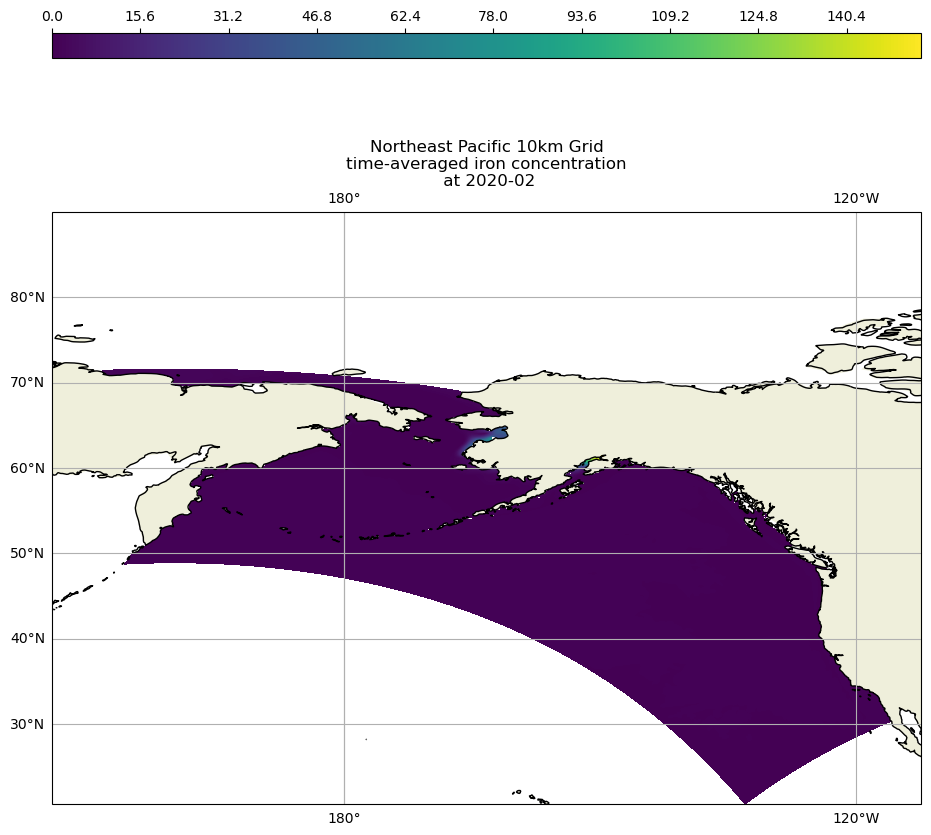

In [25]:
title_date='2020-02'
aspect = (xmax - xmin)/(ymax-ymin)
plt.figure(figsize=(25*aspect,25))
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([xmin, xmax, ymin, ymax], crs=proj180)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines('50m')
gl = ax.gridlines(draw_labels=True)
ct = ax.contourf(ds.cf['longitude'], ds.cf['latitude'], ds['Iron'].sel(ocean_time='2020-02-15', s_rho=-.99, method='nearest'), levels=255, transform=proj180)
plt.colorbar(ct, orientation='horizontal',pad=0.08, aspect=35, fraction=.06, location='top')
plt.title(ds.attrs['title'] + '\n' + ds['Iron'].attrs['long_name'] + '\n at ' + title_date , y=1.03)
plt.show()